<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exploration-notebook-project-3" data-toc-modified-id="Exploration-notebook-project-3-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exploration notebook project 3</a></span><ul class="toc-item"><li><span><a href="#Cleaning" data-toc-modified-id="Cleaning-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Cleaning</a></span><ul class="toc-item"><li><span><a href="#Get-2015-and-2016-datasets" data-toc-modified-id="Get-2015-and-2016-datasets-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Get 2015 and 2016 datasets</a></span></li><li><span><a href="#Rename-columns-2016" data-toc-modified-id="Rename-columns-2016-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Rename columns 2016</a></span></li><li><span><a href="#Solve-Latitude,-Logitude-stuff" data-toc-modified-id="Solve-Latitude,-Logitude-stuff-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Solve Latitude, Logitude stuff</a></span></li><li><span><a href="#Remove-unuseful-columns" data-toc-modified-id="Remove-unuseful-columns-1.1.4"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>Remove unuseful columns</a></span></li><li><span><a href="#Check-symetry-between-2015-and-2016" data-toc-modified-id="Check-symetry-between-2015-and-2016-1.1.5"><span class="toc-item-num">1.1.5&nbsp;&nbsp;</span>Check symetry between 2015 and 2016</a></span></li><li><span><a href="#Concatenation-of-2015-and-2016" data-toc-modified-id="Concatenation-of-2015-and-2016-1.1.6"><span class="toc-item-num">1.1.6&nbsp;&nbsp;</span>Concatenation of 2015 and 2016</a></span></li><li><span><a href="#Keep-one-uniqueBuildingID-between-2015-and-2016" data-toc-modified-id="Keep-one-uniqueBuildingID-between-2015-and-2016-1.1.7"><span class="toc-item-num">1.1.7&nbsp;&nbsp;</span>Keep one uniqueBuildingID between 2015 and 2016</a></span></li><li><span><a href="#Keep-only-residential-lines" data-toc-modified-id="Keep-only-residential-lines-1.1.8"><span class="toc-item-num">1.1.8&nbsp;&nbsp;</span>Keep only residential lines</a></span></li><li><span><a href="#Drop-unuseful-or-leaked-columns" data-toc-modified-id="Drop-unuseful-or-leaked-columns-1.1.9"><span class="toc-item-num">1.1.9&nbsp;&nbsp;</span>Drop unuseful or leaked columns</a></span></li><li><span><a href="#%-of-NaN-too-big" data-toc-modified-id="%-of-NaN-too-big-1.1.10"><span class="toc-item-num">1.1.10&nbsp;&nbsp;</span>% of NaN too big</a></span></li><li><span><a href="#Replacement-NaN-by-Median" data-toc-modified-id="Replacement-NaN-by-Median-1.1.11"><span class="toc-item-num">1.1.11&nbsp;&nbsp;</span>Replacement NaN by Median</a></span></li><li><span><a href="#Remove-12-NaN-lines-LargestPropertyUseType" data-toc-modified-id="Remove-12-NaN-lines-LargestPropertyUseType-1.1.12"><span class="toc-item-num">1.1.12&nbsp;&nbsp;</span>Remove 12 NaN lines LargestPropertyUseType</a></span></li><li><span><a href="#Display-dataset" data-toc-modified-id="Display-dataset-1.1.13"><span class="toc-item-num">1.1.13&nbsp;&nbsp;</span>Display dataset</a></span></li></ul></li><li><span><a href="#Analysis" data-toc-modified-id="Analysis-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Analysis</a></span><ul class="toc-item"><li><span><a href="#Univariate-analysis-(quantitative)" data-toc-modified-id="Univariate-analysis-(quantitative)-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Univariate analysis (quantitative)</a></span></li><li><span><a href="#Univariate-analysis-(qualitative)" data-toc-modified-id="Univariate-analysis-(qualitative)-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Univariate analysis (qualitative)</a></span></li><li><span><a href="#Bivariate-analysis-(Energy)" data-toc-modified-id="Bivariate-analysis-(Energy)-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Bivariate analysis (Energy)</a></span></li><li><span><a href="#Bivariate-analysis-(CO2)" data-toc-modified-id="Bivariate-analysis-(CO2)-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>Bivariate analysis (CO2)</a></span></li><li><span><a href="#Export" data-toc-modified-id="Export-1.2.5"><span class="toc-item-num">1.2.5&nbsp;&nbsp;</span>Export</a></span></li></ul></li></ul></li></ul></div>

### Exploration notebook project 3
#### Cleaning
---
##### Get 2015 and 2016 datasets


In [36]:
import pandas as pd
df2015 = pd.read_csv("2015-building-energy-benchmarking.csv", sep=',')  
df2016 = pd.read_csv("2016-building-energy-benchmarking.csv", sep=',') 

##### Rename columns 2016

In [37]:
df2016 = df2016.rename(columns={'TotalGHGEmissions': 'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity': 'GHGEmissionsIntensity(kgCO2e/ft2)'})

##### Solve Latitude, Logitude stuff

In [38]:
remove_characters = [" ", "{", "}", "'"]
latitude = []
longitude = []
for index, row in df2015.iterrows():
    value = row['Location']
    for character in remove_characters:
        value = value.replace(character, "")
    value = value.replace(',', ":")
    #print(value)
    tab = value.split(":")
    #print(tab)
    latitude.append(tab[1])
    longitude.append(tab[3])
    
df2015['Latitude'] = latitude   
df2015['Longitude'] = longitude 

##### Remove unuseful columns

In [39]:
df2015 = df2015.drop(columns=['Location', 'OtherFuelUse(kBtu)', 'DefaultData', 'Comment'])
df2015 = df2015.drop(columns=['ComplianceStatus', 'Outlier', '2010 Census Tracts', 'Seattle Police Department Micro Community Policing Plan Areas'])
df2015 = df2015.drop(columns=['City Council Districts', 'SPD Beats', 'Zip Codes'])

df2016 = df2016.drop(columns=['Address', 'City', 'State', 'ZipCode'])
df2016 = df2016.drop(columns=['DefaultData', 'Comments', 'ComplianceStatus', 'Outlier'])

##### Check symetry between 2015 and 2016

In [40]:
print(len(df2015.columns))
print(len(df2016.columns))
if set(df2015.columns) == set(df2016.columns):
    print('The two dataframes have strictly the same columns.')
else:
    print('Problem...')

38
38
The two dataframes have strictly the same columns.


##### Concatenation of 2015 and 2016

In [41]:
dfReference = pd.concat([df2016,df2015], ignore_index=True)

##### Keep one uniqueBuildingID between 2015 and 2016

In [42]:
dfReference = dfReference.drop_duplicates(
    subset=['OSEBuildingID'], keep="first")

##### Keep only residential lines

In [43]:
print(dfReference['BuildingType'].unique())
listBuildingTypeValues = ['NonResidential','Nonresidential COS','Nonresidential WA']
dfReference = dfReference[dfReference['BuildingType'].isin(listBuildingTypeValues)]

['NonResidential' 'Nonresidential COS' 'Multifamily MR (5-9)'
 'SPS-District K-12' 'Campus' 'Multifamily LR (1-4)'
 'Multifamily HR (10+)' 'Nonresidential WA']


##### Drop unuseful or leaked columns

In [44]:
dfReference = dfReference.drop(columns=['PropertyName', 
                                        'TaxParcelIdentificationNumber',
                                       ])
dfReference = dfReference.drop(columns=['SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SteamUse(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'Electricity(kWh)', 'Electricity(kBtu)'])

##### % of NaN too big

In [45]:
print(dfReference.isnull().sum().sum())
listNaN = dfReference.columns[dfReference.isna().any()].tolist()
print(listNaN)

for colName in listNaN:
  ratio = (dfReference[colName].isna().sum() / len(dfReference)) * 100
  print(colName + ": " + str(ratio) + " %")
    
dfReference = dfReference.drop(columns=['SecondLargestPropertyUseType', 
                                        'SecondLargestPropertyUseTypeGFA',
                                        'ThirdLargestPropertyUseType',
                                        'ThirdLargestPropertyUseTypeGFA',
                                        'ListOfAllPropertyUseTypes' # complicate to manage
                                       ])

5969
['NumberofBuildings', 'ListOfAllPropertyUseTypes', 'LargestPropertyUseType', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)']
NumberofBuildings: 0.12706480304955528 %
ListOfAllPropertyUseTypes: 0.5082592121982211 %
LargestPropertyUseType: 0.7623888182973316 %
LargestPropertyUseTypeGFA: 0.7623888182973316 %
SecondLargestPropertyUseType: 45.80686149936468 %
SecondLargestPropertyUseTypeGFA: 45.80686149936468 %
ThirdLargestPropertyUseType: 77.89072426937739 %
ThirdLargestPropertyUseTypeGFA: 77.89072426937739 %
YearsENERGYSTARCertified: 94.15501905972046 %
ENERGYSTARScore: 34.9428208386277 %
SiteEnergyUse(kBtu): 0.12706480304955528 %
SiteEnergyUseWN(kBtu): 0.1905972045743329 %
GHGEmissions(MetricTonsCO2e): 0.127064

##### Replacement NaN by Median

In [46]:
listNaN = dfReference.columns[dfReference.isna().any()].tolist()
print(listNaN)
listNaN = ['NumberofBuildings', 'LargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)']
for colName in listNaN:
  #print(colName)
  median = dfReference[colName].median(skipna=True)
  #print(median)
  dfReference[colName]=dfReference[colName].fillna(median)
listNaN = dfReference.columns[dfReference.isna().any()].tolist()    
dfReference.isnull().sum().sum()

['NumberofBuildings', 'LargestPropertyUseType', 'LargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)']


12

##### Remove 12 NaN lines LargestPropertyUseType

In [47]:
dfReference.dropna(subset = ["LargestPropertyUseType"], inplace=True)

##### Display dataset

In [48]:
dfReference.head(5)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,...,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2)
0,1,2016,NonResidential,Hotel,7,DOWNTOWN,47.6122,-122.33799,1927,1.0,...,0,88434,Hotel,88434.0,201370117010.5,60.0,7226362.5,7456910.0,249.98,2.83
1,2,2016,NonResidential,Hotel,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,...,15064,88502,Hotel,83880.0,201370117010.5,61.0,8387933.0,8664479.0,295.86,2.86
2,3,2016,NonResidential,Hotel,7,DOWNTOWN,47.61393,-122.3381,1969,1.0,...,196718,759392,Hotel,756493.0,201370117010.5,43.0,72587024.0,73937112.0,2089.28,2.19
3,5,2016,NonResidential,Hotel,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,...,0,61320,Hotel,61320.0,201370117010.5,56.0,6794584.0,6946800.5,286.43,4.67
4,8,2016,NonResidential,Hotel,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,...,62000,113580,Hotel,123445.0,201370117010.5,75.0,14172606.0,14656503.0,505.01,2.88


In [49]:
print(dfReference.columns)

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'CouncilDistrictCode', 'Neighborhood', 'Latitude', 'Longitude',
       'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'GHGEmissions(MetricTonsCO2e)',
       'GHGEmissionsIntensity(kgCO2e/ft2)'],
      dtype='object')


#### Analysis
##### Univariate analysis (quantitative)

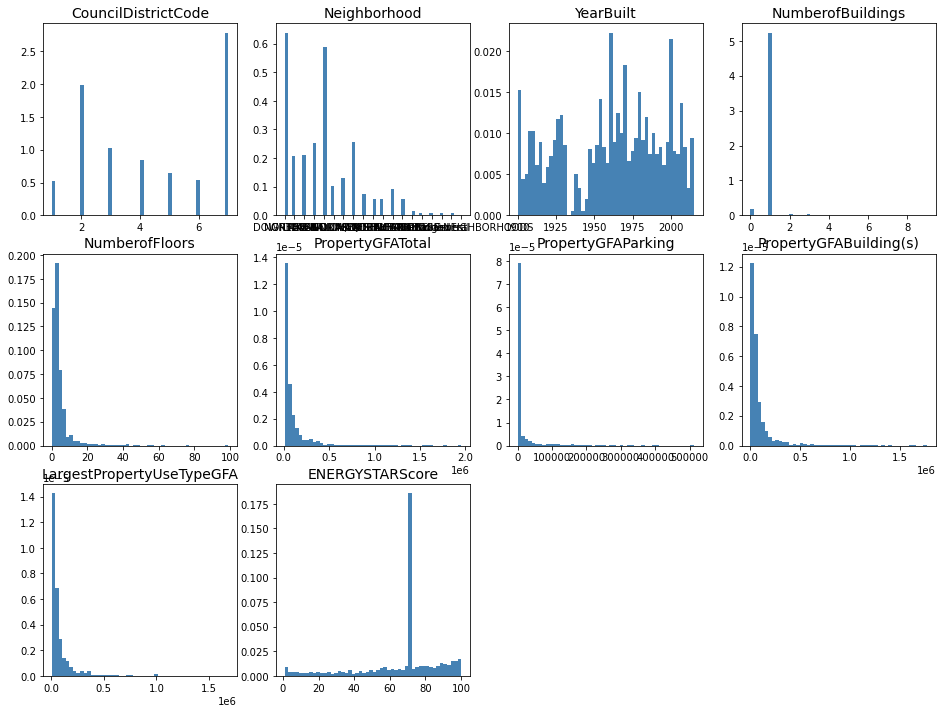

In [51]:
fig = plt.figure(figsize=(16, 12))
feat_idx = 0
cols = ['CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA',
       'ENERGYSTARScore']
for colname in cols:
    ax = fig.add_subplot(3,4, (feat_idx+1))
    h = ax.hist(dfReference[colname], bins=50, color = 'steelblue', density=True, edgecolor='none')
    ax.set_title(colname, fontsize=14)
    feat_idx = feat_idx + 1

##### Univariate analysis (qualitative)

<AxesSubplot:>

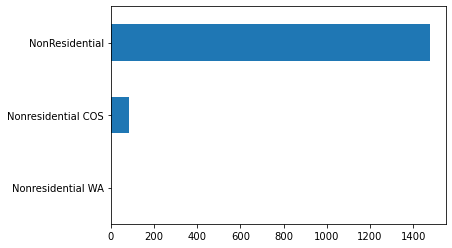

In [62]:
dfReference['BuildingType'].value_counts().sort_values().plot(kind = 'barh')

<AxesSubplot:>

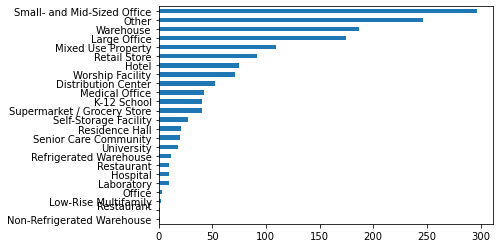

In [63]:
dfReference['PrimaryPropertyType'].value_counts().sort_values().plot(kind = 'barh')

<AxesSubplot:>

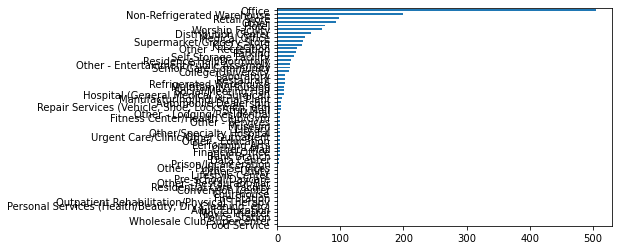

In [64]:
dfReference['LargestPropertyUseType'].value_counts().sort_values().plot(kind = 'barh')

<AxesSubplot:>

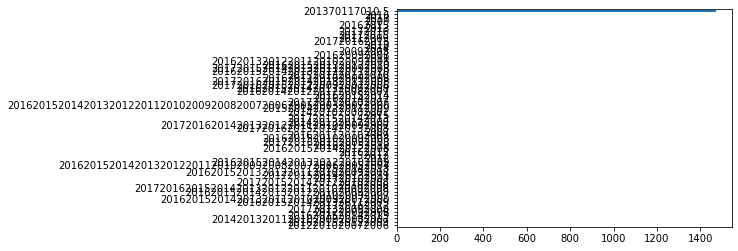

In [65]:
dfReference['YearsENERGYSTARCertified'].value_counts().sort_values().plot(kind = 'barh')

##### Bivariate analysis (Energy)

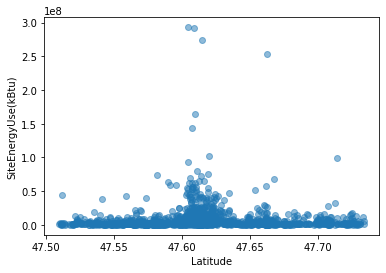

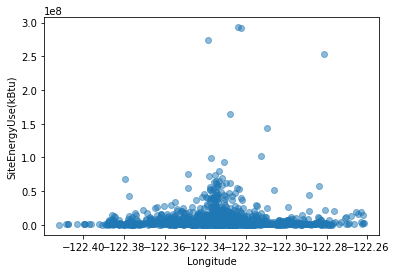

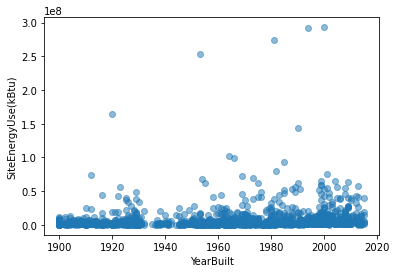

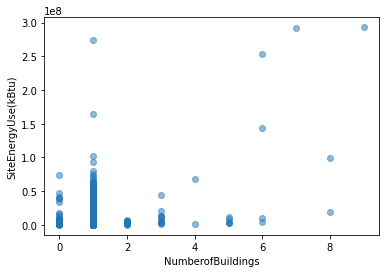

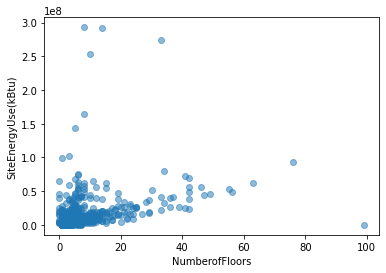

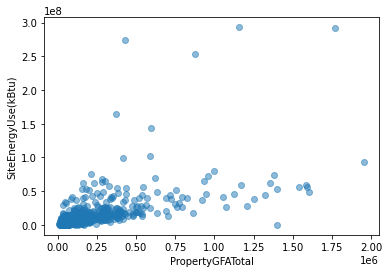

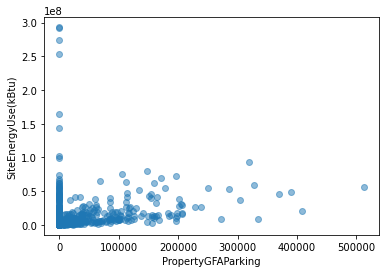

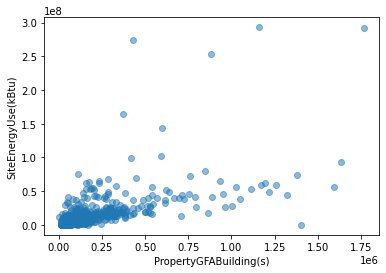

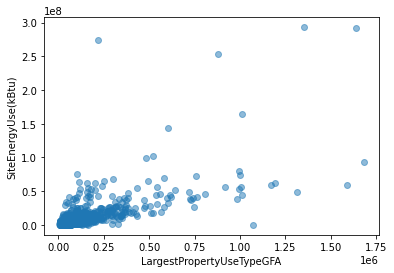

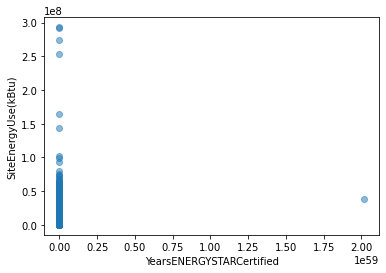

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#cols2 = ['PrimaryPropertyType', 'CouncilDistrictCode', 'Neighborhood', 'LargestPropertyUseType', 'ENERGYSTARScore']
cols = ['Latitude', 'Longitude',
       'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', ]

for colname in cols:
    plt.plot(dfReference[colname],dfReference["SiteEnergyUse(kBtu)"],'o',alpha=0.5)
    plt.xlabel(colname)
    plt.ylabel("SiteEnergyUse(kBtu)")
    plt.show()

##### Bivariate analysis (CO2)

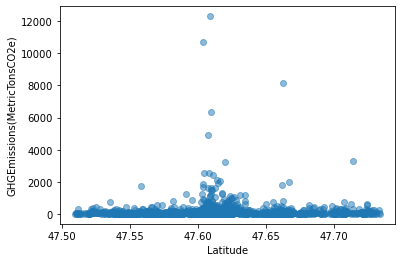

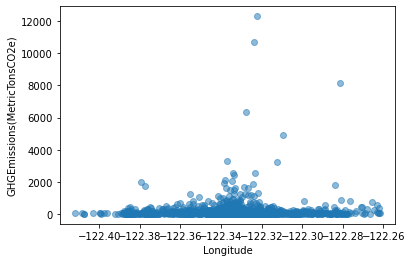

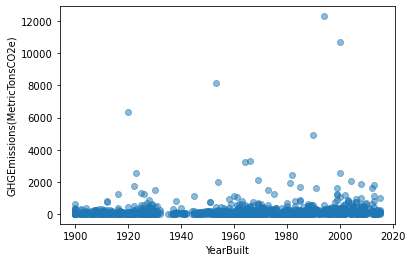

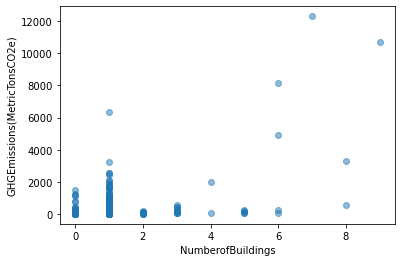

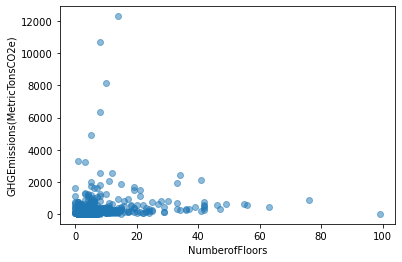

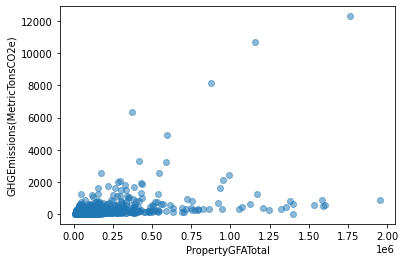

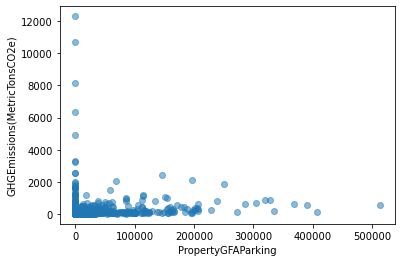

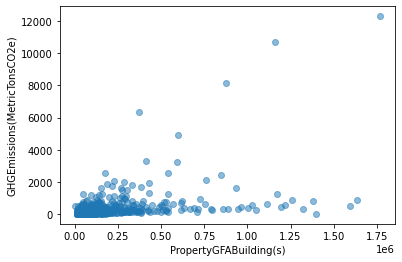

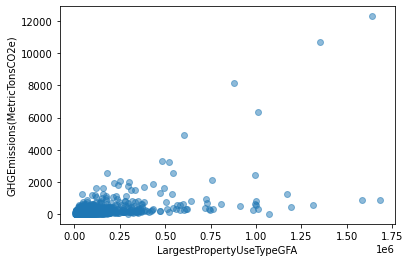

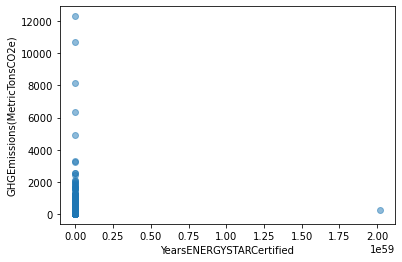

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
cols = ['Latitude', 'Longitude',
       'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', ]

for colname in cols:
    plt.plot(dfReference[colname],dfReference["GHGEmissions(MetricTonsCO2e)"],'o',alpha=0.5)
    plt.xlabel(colname)
    plt.ylabel("GHGEmissions(MetricTonsCO2e)")
    plt.show()

##### Export

In [70]:
dfReference.to_csv('P3_cleaaned_2021-12.csv')
dfReference.head(5)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,...,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2)
0,1,2016,NonResidential,Hotel,7,DOWNTOWN,47.6122,-122.33799,1927,1.0,...,0,88434,Hotel,88434.0,201370117010.5,60.0,7226362.5,7456910.0,249.98,2.83
1,2,2016,NonResidential,Hotel,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,...,15064,88502,Hotel,83880.0,201370117010.5,61.0,8387933.0,8664479.0,295.86,2.86
2,3,2016,NonResidential,Hotel,7,DOWNTOWN,47.61393,-122.3381,1969,1.0,...,196718,759392,Hotel,756493.0,201370117010.5,43.0,72587024.0,73937112.0,2089.28,2.19
3,5,2016,NonResidential,Hotel,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,...,0,61320,Hotel,61320.0,201370117010.5,56.0,6794584.0,6946800.5,286.43,4.67
4,8,2016,NonResidential,Hotel,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,...,62000,113580,Hotel,123445.0,201370117010.5,75.0,14172606.0,14656503.0,505.01,2.88
